Question 1: Write a Python function that takes in two arrays of data and calculates the F-value for a variance ratio test. The function should return the F-value and the corresponding p-value for the test.

In [1]:
import numpy as np
from scipy.stats import f

def variance_ratio_test(array1, array2):
    """
    Calculates the F-value and p-value for a variance ratio test given two arrays of data.
    """
    # Calculates length of each array
    n1 = len(array1)
    n2 = len(array2)
    
    # Calculates Sample Variances , ddof=1
    var1 = np.var(array1, ddof=1)
    var2 = np.var(array2, ddof=1)
    
    # Calculates F values along with degrees of freedom    
    if var1 >= var2:
        f_statistic = var1/var2
        dfn = n1-1
        dfd = n2-1        
    else:
        f_statistic = var2/var1
        dfn = n2-1
        dfd = n1-1
    
    p_value = 1 - f.cdf(f_statistic, dfn, dfd)
    
    return f_statistic, p_value

In [2]:
array1 = [1, 2, 3, 4, 5]
array2 = [2, 4, 6, 8, 10]

F, p_value = variance_ratio_test(array2, array1)

print("F-value:", round(F,4))
print("p-value:", round(p_value,4))

F-value: 4.0
p-value: 0.104


Interpretation of Above assuming significance as 0.05

Because p_value>0.05 we FAIL to reject the Null Hypothesis

There is NOT enough evidence to suggest that the variances are different.

Question 2 : Given a significance level of 0.05 and the degrees of freedom for the numerator and denominator of an F-distribution, write a Python function that returns the critical F-value for a two-tailed test.
 
    Answer :

        For a two tailed test there will be two critical F values because F distribution is not symmetric

In [3]:
from scipy.stats import f

def critical_f_value(alpha, dfn, dfd):
    """
    Returns the critical F-value for a two-tailed test given a significance level (alpha)
    and the degrees of freedom for the numerator (dfn) and denominator (dfd) of an F-distribution.
    """
    # Calculates critical values for two tailed F-test
    F_crit1 = f.ppf(alpha/2, dfn, dfd)
    F_crit2 = f.ppf(1-alpha/2,dfn, dfd)

    return F_crit1, F_crit2
alpha = 0.05
dfn = 10
dfd = 20

F1, F2 = critical_f_value(alpha, dfn, dfd)

print("Critical F-values are:",round(F1,4),"and" ,round(F2,4))

Critical F-values are: 0.2925 and 2.7737


Rejection region Reject H0 (Null Hypothesis) if F < 0.2952 or F > 2.7737

Question 3 : Write a Python program that generates random samples from two normal distributions with known variances and uses an F-test to determine if the variances are equal. The program should output the Fvalue, degrees of freedom, and p-value for the test.

In [4]:
import numpy as np
from scipy.stats import f

# Set seed for reproducibility
np.random.seed(456)

# Generate random samples from two normal distributions with known variances
n1 = 30
n2 = 40
mean1 = 10
mean2 = 20
var1 = 6
var2 = 4

sample1 = np.random.normal(mean1, np.sqrt(var1), n1)
sample2 = np.random.normal(mean2, np.sqrt(var2), n2)

# Calculate the F-value and p-value for the variance ratio test
F = np.var(sample1, ddof=1) / np.var(sample2, ddof=1)
dfn = n1 - 1
dfd = n2 - 1
p_value = 2 * min(f.cdf(F, dfn, dfd), 1 - f.cdf(F, dfn, dfd))

# Output the results
print("Sample 1 mean: {:.2f}, variance: {:.2f}".format(np.mean(sample1), np.var(sample1, ddof=1)))
print("Sample 2 mean: {:.2f}, variance: {:.2f}".format(np.mean(sample2), np.var(sample2, ddof=1)))
print("F-value: {:.2f}".format(F))
print("Degrees of freedom: ({}, {})".format(dfn, dfd))
print("p-value: {:.4f}".format(p_value))

print('\n===================================================================\n')

# Null Hypothesis and Alternate hypothesis 
null_hypothesis = "Variance of two samples population is same"
alternate_hypothesis = "Variance of both samples population is different"

# Assuming alpha value of 0.05 
alpha = 0.05

# Calculates critical values for two tailed F-test
F_crit1 = f.ppf(alpha/2, dfn, dfd)
F_crit2 = f.ppf(1-alpha/2,dfn, dfd)

# Print Critical F values 
print(f'Significance Level : {alpha}')
print(f'Numerator dof : {dfn}')
print(f'Denominator dof : {dfd}')
print(f"Critical F-values are {F_crit1:.4f} and {F_crit2:.4f}")

# Conclusion 
if (F < F_crit1) or (F > F_crit2):
    print('Reject the Null Hypothesis')
    print(f'Conculsion : {alternate_hypothesis}')
else:
    print('FAILED to reject the Null Hypothesis')
    print(f'Conculsion : {null_hypothesis}')

Sample 1 mean: 10.48, variance: 5.47
Sample 2 mean: 19.90, variance: 2.94
F-value: 1.86
Degrees of freedom: (29, 39)
p-value: 0.0711


Significance Level : 0.05
Numerator dof : 29
Denominator dof : 39
Critical F-values are 0.4920 and 1.9619
FAILED to reject the Null Hypothesis
Conculsion : Variance of two samples population is same


Question 4 : The variances of two populations are known to be 10 and 15. A sample of 12 observations is taken from each population. Conduct an F-test at the 5% significance level to determine if the variances are significantly different.

In [5]:
from scipy.stats import f

# Generate random samples from two normal distributions with known variances
n1 = 12
n2 = 12
var1 = 10
var2 = 15

# Calculate the F-value and p-value for the variance ratio test
F = var1/var2
dfn = n1 - 1
dfd = n2 - 1
p_value = 2 * min(f.cdf(F, dfn, dfd), 1 - f.cdf(F, dfn, dfd))

# Output the results
print("Sample 1 variance: {:.2f}".format(var1))
print("Sample 2 variance: {:.2f}".format(var2))
print("F-value: {:.4f}".format(F))
print("Degrees of freedom: ({}, {})".format(dfn, dfd))
print("p-value: {:.4f}".format(p_value))

print('\n===================================================================\n')

# Null Hypothesis and Alternate hypothesis 
null_hypothesis = "Variance of two samples population is same"
alternate_hypothesis = "Variance of both samples population is different"

# Assuming alpha value of 0.05 
alpha = 0.05

# Calculates critical values for two tailed F-test
F_crit1 = f.ppf(alpha/2, dfn, dfd)
F_crit2 = f.ppf(1-alpha/2,dfn, dfd)

# Print Critical F values 
print(f'Significance Level : {alpha}')
print(f'Numerator dof : {dfn}')
print(f'Denominator dof : {dfd}')
print(f"Critical F-values are {F_crit1:.4f} and {F_crit2:.4f}")

# Conclusion 
if (F < F_crit1) or (F > F_crit2):
    print('Reject the Null Hypothesis')
    print(f'Conculsion : {alternate_hypothesis}')
else:
    print('FAILED to reject the Null Hypothesis')
    print(f'Conculsion : {null_hypothesis}')

Sample 1 variance: 10.00
Sample 2 variance: 15.00
F-value: 0.6667
Degrees of freedom: (11, 11)
p-value: 0.5124


Significance Level : 0.05
Numerator dof : 11
Denominator dof : 11
Critical F-values are 0.2879 and 3.4737
FAILED to reject the Null Hypothesis
Conculsion : Variance of two samples population is same


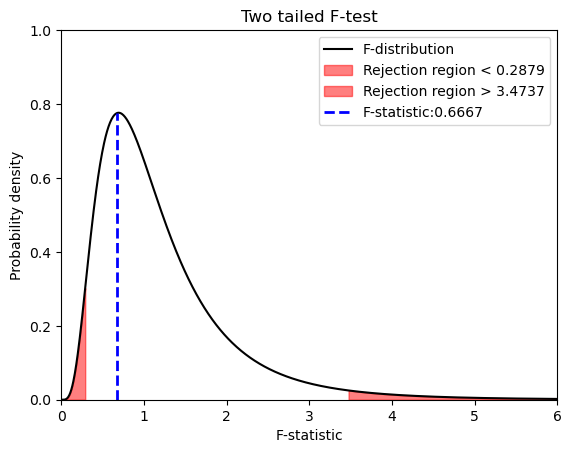

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# plot the F-distribution
x = np.linspace(0, 6, 1000)
y = f.pdf(x, dfn, dfd)
plt.plot(x, y, 'k-', label='F-distribution')

# shade the critical region 1
x_crit1 = np.linspace(0, F_crit1, 100)
y_crit1 = f.pdf(x_crit1, dfn, dfd)
plt.fill_between(x_crit1, y_crit1, 0, color='red', alpha=0.5, label=f'Rejection region < {F_crit1:.4f}')

# shade the critical region 2
x_crit2 = np.linspace(F_crit2, 6, 100)
y_crit2 = f.pdf(x_crit2, dfn, dfd)
plt.fill_between(x_crit2, y_crit2, 0, color='red', alpha=0.5, label=f'Rejection region > {F_crit2:.4f}')

# highlight the F-statistic
y_stat = f.pdf(F, dfn, dfd)
plt.plot([F, F], [0, y_stat], 'b--', linewidth=2, label=f'F-statistic:{F:.4f}')

# set the plot parameters
plt.xlim([0, 6])
plt.ylim([0, 1])
plt.xlabel('F-statistic')
plt.ylabel('Probability density')
plt.title('Two tailed F-test')
plt.legend()
plt.show()

Question 5 : A manufacturer claims that the variance of the diameter of a certain product is 0.005. A sample of 25 products is taken, and the sample variance is found to be 0.006. Conduct an F-test at the 1% significance level to determine if the claim is justified.

In [7]:
import scipy.stats as stats

# set the significance level
alpha = 0.01

# set the claimed population variance and sample variance
sigma2 = 0.005
s2 = 0.006

# set the sample size
n = 25

# Null Hypothesis and alternate hypothesis
null_hypothesis = "The variance of the diameter of the product is 0.005"
alternate_hypothesis = "The variance of the diameter of the product is NOT 0.005."

# calculate the F-statistic
F = s2 / sigma2

# calculate the critical value of the F-distribution
dfn = n - 1
dfd = n - 1

# calculate the p-value
p_value = 2 * min(f.cdf(F, dfn, dfd), 1 - f.cdf(F, dfn, dfd))

# Calculates critical values for two tailed F-test
alpha = 0.01
F_crit1 = f.ppf(alpha/2, dfn, dfd)
F_crit2 = f.ppf(1-alpha/2,dfn, dfd)

# print the results
print(f"F-statistic: {F:.4f}")
print(f"F Critical values: {F_crit1:.4f} and {F_crit2:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject null hypothesis.")
    print(f"Conclusion : {alternate_hypothesis}")
else:
    print("FAIL to reject null hypothesis.")
    print(f"Conclusion : {null_hypothesis}")

F-statistic: 1.2000
F Critical values: 0.3371 and 2.9667
P-value: 0.6587
FAIL to reject null hypothesis.
Conclusion : The variance of the diameter of the product is 0.005


Question 6 : Write a Python function that takes in the degrees of freedom for the numerator and denominator of an F-distribution and calculates the mean and variance of the distribution. The function should return the mean and variance as a tuple.

In [3]:
def f_distribution_mean_var(df1:int, df2:int):
    """
    Calculates the mean and variance of an F-distribution with
    df1 degrees of freedom in the numerator and df2 degrees of
    freedom in the denominator.
    
    Args:
    df1 (int): Degrees of freedom in the numerator.
    df2 (int): Degrees of freedom in the denominator.
    
    Returns:
    tuple: Mean and variance of the F-distribution.
    """
    if df1 <= 0 or df2 <= 0:
        raise ValueError("Degrees of freedom must be positive.")
    
    mean = df2 / (df2 - 2)
    var = (2 * df2 ** 2 * (df1 + df2 - 2)) / (df1 * (df2 - 2) ** 2 * (df2 - 4))
    
    return (mean, var)

In [2]:
mean, var = f_distribution_mean_var(10, 23)
print(f"Mean: {mean:.4f}, Variance: {var:.4f}")

Mean: 1.0952, Variance: 0.3914


Question 7 : A random sample of 10 measurements is taken from a normal population with unknown variance. The sample variance is found to be 25. Another random sample of 15 measurements is taken from another normal population with unknown variance, and the sample variance is found to be 20. Conduct an F-test at the 10% significance level to determine if the variances are significantly different.

In [4]:
import numpy as np
from scipy.stats import f

# Set significance level and degrees of freedom
alpha = 0.10
n1 = 10
n2 = 15
df1 = n1-1
df2 = n2-1

# Variance for each group
var1 = 25
var2 = 20

# Null and Alternate hypothesis
null_hypothesis = "Variances are similar"
alternate_hypothesis =  "Variances are significantly different"

# Calculate F-statistic
f_statistic = var1/var2
p_value = 1 - f.cdf(f_statistic, df1, df2) 

# Calculate F-critical
F_crit = f.ppf(1-alpha,df1, df2)

# print the results
print(f"F-statistic: {f_statistic:.4f}")
print(f"F Critical value: {F_crit:.4f}")
print(f"P-value: {p_value:.4f}")

# Determine if null hypothesis should be rejected
if p_value < alpha:
    print("Reject null hypothesis.")
    print(f"Conclusion : {alternate_hypothesis}")
else:
    print("FAIL to reject null hypothesis. ")
    print(f"Conclusion : {null_hypothesis}")

F-statistic: 1.2500
F Critical value: 2.1220
P-value: 0.3416
FAIL to reject null hypothesis. 
Conclusion : Variances are similar


Validating Above in F-table manually
F table

Link for F table

Above value shows F-critical = 2.12195
F Stat = 1.25 for our case
F < F-critical , FAIL to Reject the Null Hypothesis
Variance of both samples are similar

Question 8 : The following data represent the waiting times in minutes at two different restaurants on a Saturday night: Restaurant A: 24, 25, 28, 23, 22, 20, 27; Restaurant B: 31, 33, 35, 30, 32, 36. Conduct an F-test at the 5% significance level to determine if the variances are significantly different.

In [5]:
import numpy as np
from scipy.stats import f

def perform_f_test(sample1:list, sample2:list, alpha=0.05):

    """
    This function will take two samples as list and perform F-test
    and print the results
    """
    
    # Calculating Variances of both samples
    var1 = np.var(sample1, ddof=1)
    var2 = np.var(sample2, ddof=1)

    # Null and Alternate hypothesis
    null_hypothesis = "Variances are similar"
    alternate_hypothesis =  "Variances are significantly different"

    # Printing sample mean and variance
    print(f'Sample 1 Mean : {np.mean(sample1):.4f}, Sample 1 Variance : {var1:.4f}')
    print(f'Sample 2 Mean : {np.mean(sample2):.4f}, Sample 2 Variance : {var2:.4f}')

    print('\n================================================================================\n')

    # Calculate F-statistic
    if var1 >= var2:
        f_statistic = var1/var2
        dfn = len(sample1)-1
        dfd = len(sample2)-1        
    else:
        f_statistic = var2/var1
        dfn = len(sample2)-1
        dfd = len(sample1)-1

    # Calculating p-value
    p_value = 1 - f.cdf(f_statistic, dfn, dfd) 

    # Calculate F-critical
    F_crit = f.ppf(1-alpha, dfn, dfd)

    # print the results
    print(f"F-statistic: {f_statistic:.4f}")
    print(f"F Critical value: {F_crit:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Significance Level: {alpha}")
    
    # Determine if null hypothesis should be rejected
    if p_value < alpha:
        print("Reject null hypothesis.")
        print(f"Conclusion : {alternate_hypothesis}")
    else:
        print("FAIL to reject null hypothesis. ")
        print(f"Conclusion : {null_hypothesis}")

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

def plot_decision_boundary(sample1:list, sample2:list, alpha=0.05):

    # Calculating Variances of both samples
    var1 = np.var(sample1, ddof=1)
    var2 = np.var(sample2, ddof=1)

    # Calculate F-statistic
    if var1 >= var2:
        f_statistic = var1/var2
        dfn = len(sample1)-1
        dfd = len(sample2)-1        
    else:
        f_statistic = var2/var1
        dfn = len(sample2)-1
        dfd = len(sample1)-1
    
    # Calculate F-critical
    F_crit = f.ppf(1-alpha, dfn, dfd) 
    
    # plot the F-distribution
    x = np.linspace(0, F_crit + 2, 1000)
    y = f.pdf(x, dfn, dfd)
    plt.plot(x, y, 'k-', label='F-distribution')

    # shade the critical region 
    x_crit = np.linspace(F_crit, F_crit + 2 , 100)
    y_crit = f.pdf(x_crit, dfn, dfd)
    plt.fill_between(x_crit, y_crit, 0, color='red', alpha=0.5, label=f'Rejection region , F-critical = {F_crit:.4f}')
  
    # highlight the F-statistic
    y_stat = f.pdf(f_statistic, dfn, dfd)
    plt.plot([f_statistic, f_statistic], [0, y_stat], 'b--', linewidth=2, label=f'F-statistic = {f_statistic:.4f}')

    # set the plot parameters
    plt.xlabel('F-statistic')
    plt.ylabel('Probability density')
    plt.title('One tailed F-test')
    plt.legend()
    plt.show()
#Solving the problem with above function
# Given Sample Data
restaurant_A = [24, 25, 28, 23, 22, 20, 27]
restaurant_B = [31, 33, 35, 30, 32, 36]

# Perform F-test by calling the function
perform_f_test(restaurant_A,restaurant_B,alpha=0.05)

Sample 1 Mean : 24.1429, Sample 1 Variance : 7.8095
Sample 2 Mean : 32.8333, Sample 2 Variance : 5.3667


F-statistic: 1.4552
F Critical value: 4.9503
P-value: 0.3487
Significance Level: 0.05
FAIL to reject null hypothesis. 
Conclusion : Variances are similar


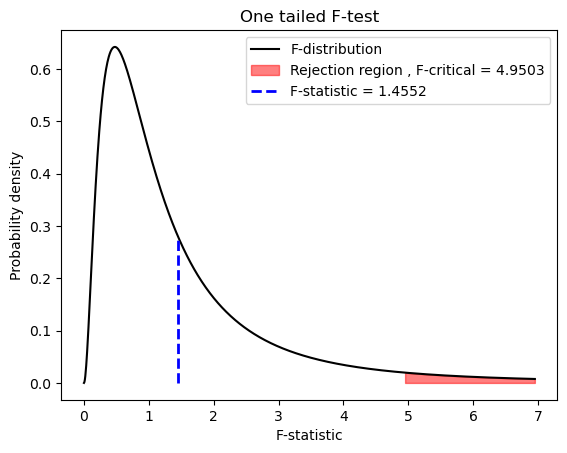

In [8]:
plot_decision_boundary(restaurant_A,restaurant_B,alpha=0.05)

FAIL to reject the Null Hypothesis

Conclusion : Restaurant A and Restaurant B has same Variance

Question 9 : The following data represent the test scores of two groups of students: Group A: 80, 85, 90, 92, 87, 83; Group B: 75, 78, 82, 79, 81, 84. Conduct an F-test at the 1% significance level to determine if the variances are significantly different.

In [9]:
# Given Sample data
group_A = [80, 85, 90, 92, 87, 83]
group_B = [75, 78, 82, 79, 81, 84]

# Calling the function from question 8 to solve this problem 
perform_f_test(group_A, group_B, alpha=0.01)

Sample 1 Mean : 86.1667, Sample 1 Variance : 19.7667
Sample 2 Mean : 79.8333, Sample 2 Variance : 10.1667


F-statistic: 1.9443
F Critical value: 10.9670
P-value: 0.2416
Significance Level: 0.01
FAIL to reject null hypothesis. 
Conclusion : Variances are similar


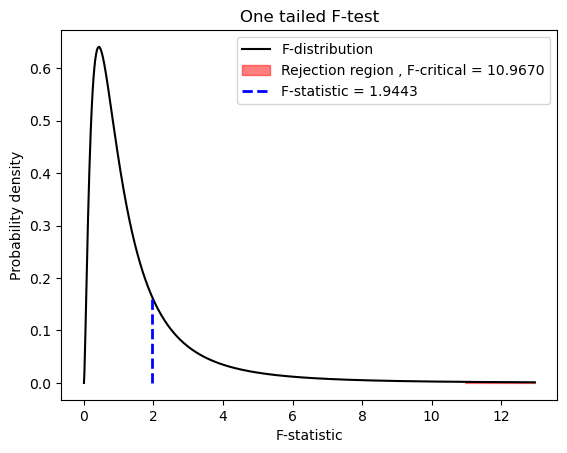

In [10]:
plot_decision_boundary(group_A,group_B, alpha=0.01)

FAIL to reject the Null Hypothesis

Conclusion : Group A and Group B has same Variance of Test Scores